In [1]:
import pandas as pd 
import numpy as np 
import warnings
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
warnings.filterwarnings('ignore')
df=pd.read_csv('ultra_marathon.csv')
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


## ***Data Cleaning and Preparation***

In [5]:
df.shape

(7461195, 13)

In [7]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

## Selecting Indian athletes for analysis 

In [9]:
df=df[df['Athlete country']=='IND']
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
5829,2018,18.03.2018,TITI 50km Road Ultra Marathon (MAS),50km,282,8:37:30 h,NaN,IND,NaN,M,NaN,5.797,5197
5843,2018,18.03.2018,TITI 50km Road Ultra Marathon (MAS),50km,282,8:44:07 h,NaN,IND,1977.0,M,M40,5.724,5211
10779,2018,17.03.2018,EcoTrail de Paris - Ile de France 45 km (FRA),45km,1393,6:09:40 h,*Heidelberg,IND,1990.0,M,M23,7.304,10112
16245,2018,17.03.2018,Om Die Dam 50km (RSA),50km,2491,5:18:55 h,Brackenfell Athletics ...,IND,1988.0,M,M23,9.407,15497
18624,2018,17.03.2018,Dalat Ultra Trail (VIE),70km,135,9:21:59 h,NaN,IND,1986.0,M,M23,7.474,17865


In [11]:
df.shape

(16677, 13)

In [21]:
len(df['Event distance/length'].unique())

215

In [23]:
df['Event distance/length'].value_counts()

Event distance/length
50km      6008
12h       1757
100km      981
24h        911
60km       583
          ... 
28h          1
63.6km       1
46.7km       1
65.3km       1
71.5km       1
Name: count, Length: 215, dtype: int64

- Keeping only the 50km,100km,12hours and 24 hours as they are the most frequent values

In [25]:
df=df[df['Event distance/length'].isin(['50km','100km','12h','24h'])]
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
5829,2018,18.03.2018,TITI 50km Road Ultra Marathon (MAS),50km,282,8:37:30 h,NaN,IND,NaN,M,NaN,5.797,5197
5843,2018,18.03.2018,TITI 50km Road Ultra Marathon (MAS),50km,282,8:44:07 h,NaN,IND,1977.0,M,M40,5.724,5211
16245,2018,17.03.2018,Om Die Dam 50km (RSA),50km,2491,5:18:55 h,Brackenfell Athletics ...,IND,1988.0,M,M23,9.407,15497
23416,2018,10.03.2018,North C Trail (BEL),50km,192,8:04:30 h,NaN,IND,1990.0,F,W23,6.192,22117
24745,2018,10.03.2018,Crazy Desert Trail Race 50k (USA),50km,59,6:21:38 h,"*Dallas, TX",IND,1987.0,M,M23,7.861,23372


In [27]:
df['Athlete club'].value_counts()

Athlete club
*Bangalore               285
*Mumbai                  228
*Chennai                 104
*Pune                     74
*Bengaluru                44
                        ... 
*Atlanta, GA               1
*Ajax                      1
*Bengalore                 1
Brackenfell Athletics      1
*Nairobi                   1
Name: count, Length: 332, dtype: int64

- As most of the values in the Athlete club are null, so we can ignore this column

In [29]:
df['Athlete club'].isnull().sum()

8126

In [31]:
df['Event name'].value_counts()

Event name
The Malnad Ultra 50K (IND)               666
Bangalore 50 km Ultra Marathon (IND)     661
Tata Ultra Marathon (IND)                486
Bengaluru 12 Hour Stadium Run (IND)      425
Mumbai 12 Hour Stadium Run (IND)         320
                                        ... 
Runners Wild Bario (MAS)                   1
3 Days at the Fair 12 Hour Race (USA)      1
London 2 Brighton Challenge (GBR)          1
MSIG Lantau 50 (HKG)                       1
Hashawha Hills 50 km Trail Run (USA)       1
Name: count, Length: 538, dtype: int64

- Checking null values

In [33]:
df.isnull().sum()

Year of event                   0
Event dates                     0
Event name                      0
Event distance/length           0
Event number of finishers       0
Athlete performance             0
Athlete club                 8126
Athlete country                 0
Athlete year of birth        3300
Athlete gender                  0
Athlete age category         3300
Athlete average speed           0
Athlete ID                      0
dtype: int64

In [35]:
df=df.dropna(subset=['Athlete year of birth'])
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
5843,2018,18.03.2018,TITI 50km Road Ultra Marathon (MAS),50km,282,8:44:07 h,NaN,IND,1977.0,M,M40,5.724,5211
16245,2018,17.03.2018,Om Die Dam 50km (RSA),50km,2491,5:18:55 h,Brackenfell Athletics ...,IND,1988.0,M,M23,9.407,15497
23416,2018,10.03.2018,North C Trail (BEL),50km,192,8:04:30 h,NaN,IND,1990.0,F,W23,6.192,22117
24745,2018,10.03.2018,Crazy Desert Trail Race 50k (USA),50km,59,6:21:38 h,"*Dallas, TX",IND,1987.0,M,M23,7.861,23372
25299,2018,10.03.2018,Dirty Duo Trail Run (CAN),50km,34,4:58:08 h,NaN,IND,1980.0,M,M35,10.063,23912


In [37]:
df.isnull().sum()

Year of event                   0
Event dates                     0
Event name                      0
Event distance/length           0
Event number of finishers       0
Athlete performance             0
Athlete club                 4899
Athlete country                 0
Athlete year of birth           0
Athlete gender                  0
Athlete age category            0
Athlete average speed           0
Athlete ID                      0
dtype: int64

- We will calculate the athlete's ages for analysis

In [39]:
df.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete club                  object
Athlete country               object
Athlete year of birth        float64
Athlete gender                object
Athlete age category          object
Athlete average speed         object
Athlete ID                     int64
dtype: object

In [41]:
df['Athlete year of birth'].value_counts()

Athlete year of birth
1980.0    331
1987.0    285
1982.0    277
1979.0    274
1978.0    271
         ... 
1933.0      1
2010.0      1
2003.0      1
1928.0      1
1936.0      1
Name: count, Length: 61, dtype: int64

## Standardizing Columns

In [43]:
df['Athlete year of birth']=df['Athlete year of birth'].astype('int64')
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
5843,2018,18.03.2018,TITI 50km Road Ultra Marathon (MAS),50km,282,8:44:07 h,NaN,IND,1977,M,M40,5.724,5211
16245,2018,17.03.2018,Om Die Dam 50km (RSA),50km,2491,5:18:55 h,Brackenfell Athletics ...,IND,1988,M,M23,9.407,15497
23416,2018,10.03.2018,North C Trail (BEL),50km,192,8:04:30 h,NaN,IND,1990,F,W23,6.192,22117
24745,2018,10.03.2018,Crazy Desert Trail Race 50k (USA),50km,59,6:21:38 h,"*Dallas, TX",IND,1987,M,M23,7.861,23372
25299,2018,10.03.2018,Dirty Duo Trail Run (CAN),50km,34,4:58:08 h,NaN,IND,1980,M,M35,10.063,23912


- We will calculate the athlete's age and add it as a column to the dataset.

In [45]:
df['Athlete_Age']=df['Year of event']-df['Athlete year of birth']
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
5843,2018,18.03.2018,TITI 50km Road Ultra Marathon (MAS),50km,282,8:44:07 h,NaN,IND,1977,M,M40,5.724,5211,41
16245,2018,17.03.2018,Om Die Dam 50km (RSA),50km,2491,5:18:55 h,Brackenfell Athletics ...,IND,1988,M,M23,9.407,15497,30
23416,2018,10.03.2018,North C Trail (BEL),50km,192,8:04:30 h,NaN,IND,1990,F,W23,6.192,22117,28
24745,2018,10.03.2018,Crazy Desert Trail Race 50k (USA),50km,59,6:21:38 h,"*Dallas, TX",IND,1987,M,M23,7.861,23372,31
25299,2018,10.03.2018,Dirty Duo Trail Run (CAN),50km,34,4:58:08 h,NaN,IND,1980,M,M35,10.063,23912,38


- Removing 'h' from **Athlete performance** column

In [50]:
# removing the 'h' from the Athlete performance
df['Athlete performance']=df['Athlete performance'].str.split(' ').str.get(0)
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
5843,2018,18.03.2018,TITI 50km Road Ultra Marathon (MAS),50km,282,8:44:07,NaN,IND,1977,M,M40,5.724,5211,41
16245,2018,17.03.2018,Om Die Dam 50km (RSA),50km,2491,5:18:55,Brackenfell Athletics ...,IND,1988,M,M23,9.407,15497,30
23416,2018,10.03.2018,North C Trail (BEL),50km,192,8:04:30,NaN,IND,1990,F,W23,6.192,22117,28
24745,2018,10.03.2018,Crazy Desert Trail Race 50k (USA),50km,59,6:21:38,"*Dallas, TX",IND,1987,M,M23,7.861,23372,31
25299,2018,10.03.2018,Dirty Duo Trail Run (CAN),50km,34,4:58:08,NaN,IND,1980,M,M35,10.063,23912,38


In [52]:
df=df.drop_duplicates()

In [54]:
df=df.reset_index()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6357 entries, 0 to 6356
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   index                      6357 non-null   int64 
 1   Year of event              6357 non-null   int64 
 2   Event dates                6357 non-null   object
 3   Event name                 6357 non-null   object
 4   Event distance/length      6357 non-null   object
 5   Event number of finishers  6357 non-null   int64 
 6   Athlete performance        6357 non-null   object
 7   Athlete club               1458 non-null   object
 8   Athlete country            6357 non-null   object
 9   Athlete year of birth      6357 non-null   int64 
 10  Athlete gender             6357 non-null   object
 11  Athlete age category       6357 non-null   object
 12  Athlete average speed      6357 non-null   object
 13  Athlete ID                 6357 non-null   int64 
 14  Athlete_

In [60]:
df['Athlete average speed']=df['Athlete average speed'].astype('float64')

In [64]:
df = df[df['Athlete average speed'] < 20]
df.head()

,index,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
0,5843,2018,18.03.2018,TITI 50km Road Ultra Marathon (MAS),50km,282,8:44:07,NaN,IND,1977,M,M40,5.724,5211,41
1,16245,2018,17.03.2018,Om Die Dam 50km (RSA),50km,2491,5:18:55,Brackenfell Athletics ...,IND,1988,M,M23,9.407,15497,30
2,23416,2018,10.03.2018,North C Trail (BEL),50km,192,8:04:30,NaN,IND,1990,F,W23,6.192,22117,28
3,24745,2018,10.03.2018,Crazy Desert Trail Race 50k (USA),50km,59,6:21:38,"*Dallas, TX",IND,1987,M,M23,7.861,23372,31
4,25299,2018,10.03.2018,Dirty Duo Trail Run (CAN),50km,34,4:58:08,NaN,IND,1980,M,M35,10.063,23912,38


In [66]:
df=df.drop(['Athlete club','Athlete year of birth'],axis=1)

- This is the final version of dataset we will use for analysis

In [71]:
df.isnull().sum()

index                        0
Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete country              0
Athlete gender               0
Athlete age category         0
Athlete average speed        0
Athlete ID                   0
Athlete_Age                  0
dtype: int64

In [73]:
df.head()

,index,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
0,5843,2018,18.03.2018,TITI 50km Road Ultra Marathon (MAS),50km,282,8:44:07,IND,M,M40,5.724,5211,41
1,16245,2018,17.03.2018,Om Die Dam 50km (RSA),50km,2491,5:18:55,IND,M,M23,9.407,15497,30
2,23416,2018,10.03.2018,North C Trail (BEL),50km,192,8:04:30,IND,F,W23,6.192,22117,28
3,24745,2018,10.03.2018,Crazy Desert Trail Race 50k (USA),50km,59,6:21:38,IND,M,M23,7.861,23372,31
4,25299,2018,10.03.2018,Dirty Duo Trail Run (CAN),50km,34,4:58:08,IND,M,M35,10.063,23912,38


## ***Analysing and Visualising Data***


### Number of athletes participating in each of the events.

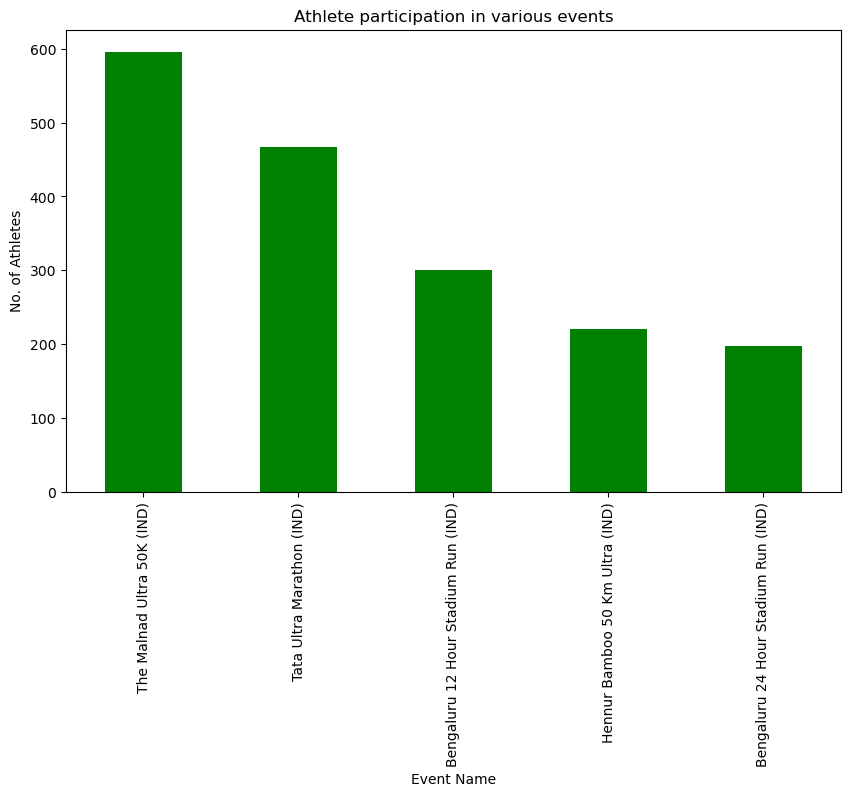

In [82]:
df['Event name'].value_counts().head().plot(kind='bar',title='Athlete participation in various events',xlabel='Event Name',ylabel='No. of Athletes',
                                           figsize=(10,6),color='green')
plt.show()

## **Event participation by Gender**

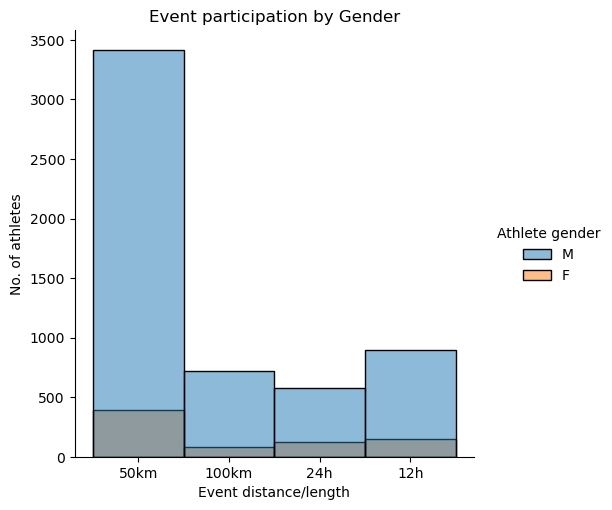

In [101]:
sns.displot(data=df,kind='hist',x='Event distance/length',hue='Athlete gender')
plt.title('Event participation by Gender')
plt.ylabel('No. of athletes')
plt.show()

In [91]:
race_by_gender=pd.crosstab(index=df['Event distance/length'],columns=df['Athlete gender'])
race_by_gender

Athlete gender,F,M
Event distance/length,,
100km,85,719
12h,146,899
24h,122,578
50km,392,3412


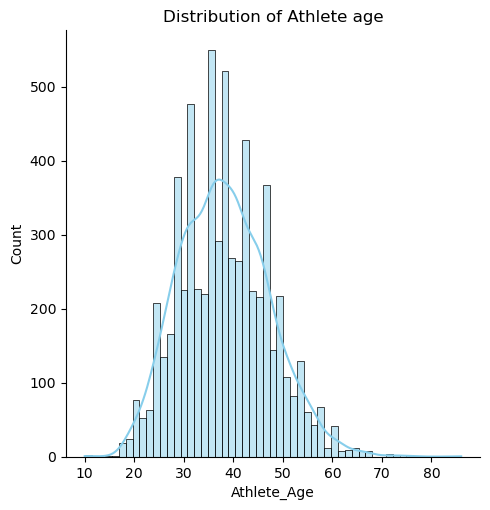

In [97]:
sns.displot(data=df,x='Athlete_Age',kind='hist',color='skyblue',kde='True')
plt.title("Distribution of Athlete age")
plt.show()

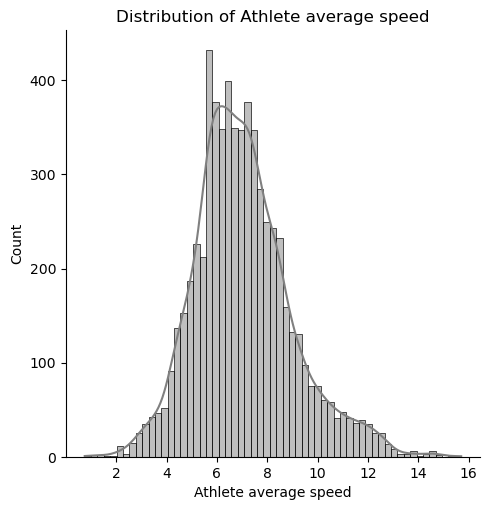

In [99]:
sns.displot(data=df,x='Athlete average speed',color='grey',kde=True)
plt.title("Distribution of Athlete average speed")
plt.show()

In [103]:
age_vs_speed=df.groupby(['Athlete age category'])['Athlete average speed'].agg(['mean','count']).sort_values(by='mean',ascending=False).query('count>20')
age_vs_speed.head()

,mean,count
Athlete age category,,
MU23,7.627282,216
M23,7.262704,1974
W50,7.231467,30
M35,7.078349,1156
W45,6.946688,80


## **Average speed vs Age**

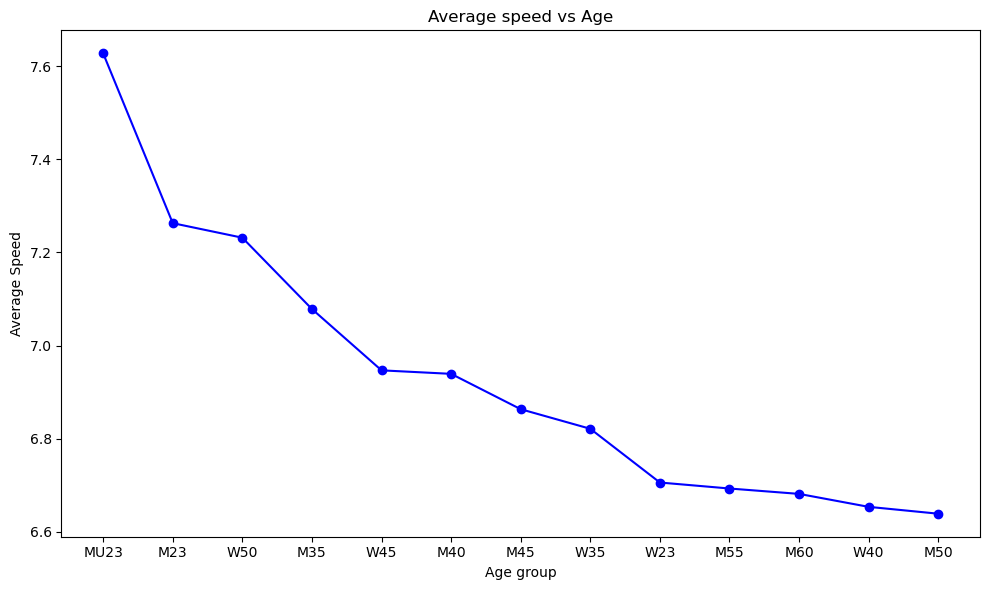

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(age_vs_speed.index, age_vs_speed['mean'], marker='o', color='b', linestyle='-')
plt.xlabel('Age group')
plt.ylabel('Average Speed')
plt.title('Average speed vs Age')
plt.tight_layout()
plt.show()

In [109]:
distance_gender=df.groupby(['Event distance/length','Athlete gender'])['Athlete average speed'].agg(['mean','count']).sort_values(by='mean',ascending=False)
data=distance_gender.reset_index()
data

,Event distance/length,Athlete gender,mean,count
0,50km,M,7.520869,3412
1,50km,F,7.124495,392
2,100km,F,6.944259,85
3,12h,M,6.796552,899
4,12h,F,6.574096,146
5,100km,M,6.565604,719
6,24h,F,5.798016,122
7,24h,M,5.633988,578


## **Athlete average speed by Event Distance and Gender**

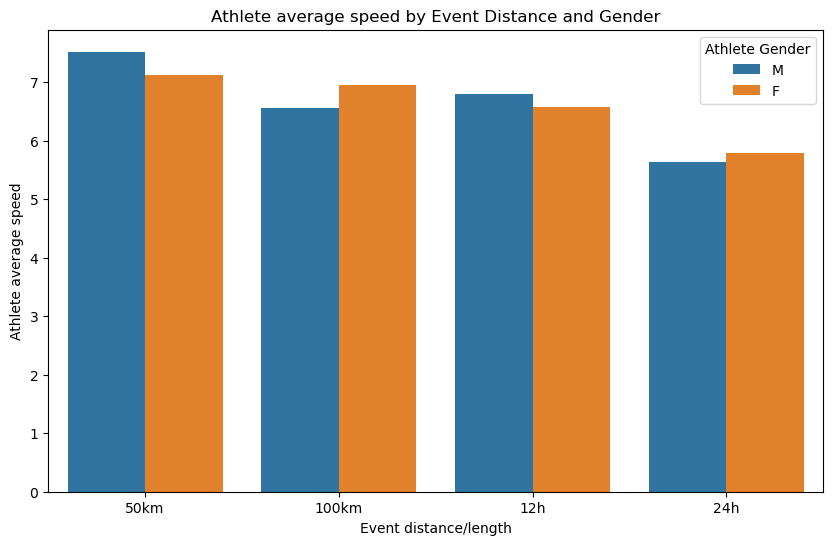

In [111]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Event distance/length', y='mean', hue='Athlete gender', data=data)
plt.xlabel('Event distance/length')
plt.ylabel('Athlete average speed')
plt.title('Athlete average speed by Event Distance and Gender')
plt.legend(title='Athlete Gender')
plt.show()

In [113]:
distance = df.groupby(['Event distance/length','Athlete gender']).agg({'Athlete gender': 'count', 'Athlete average speed': ['mean', 'count']})
distance

Athlete gender Athlete average speed  \
                                              count                  mean   
Event distance/length Athlete gender                                        
100km                 F                          85              6.944259   
                      M                         719              6.565604   
12h                   F                         146              6.574096   
                      M                         899              6.796552   
24h                   F                         122              5.798016   
                      M                         578              5.633988   
50km                  F                         392              7.124495   
                      M                        3412              7.520869   

                                            
                                     count  
Event distance/length Athlete gender        
100km                 F                 85  
                      M                719  
12h                   F                146  
                      M                899  
24h                   F                122  
                      M                578  
50km                  F                392  
                      M               3412

## **the relationship between the length of the race and athlethe average speed**

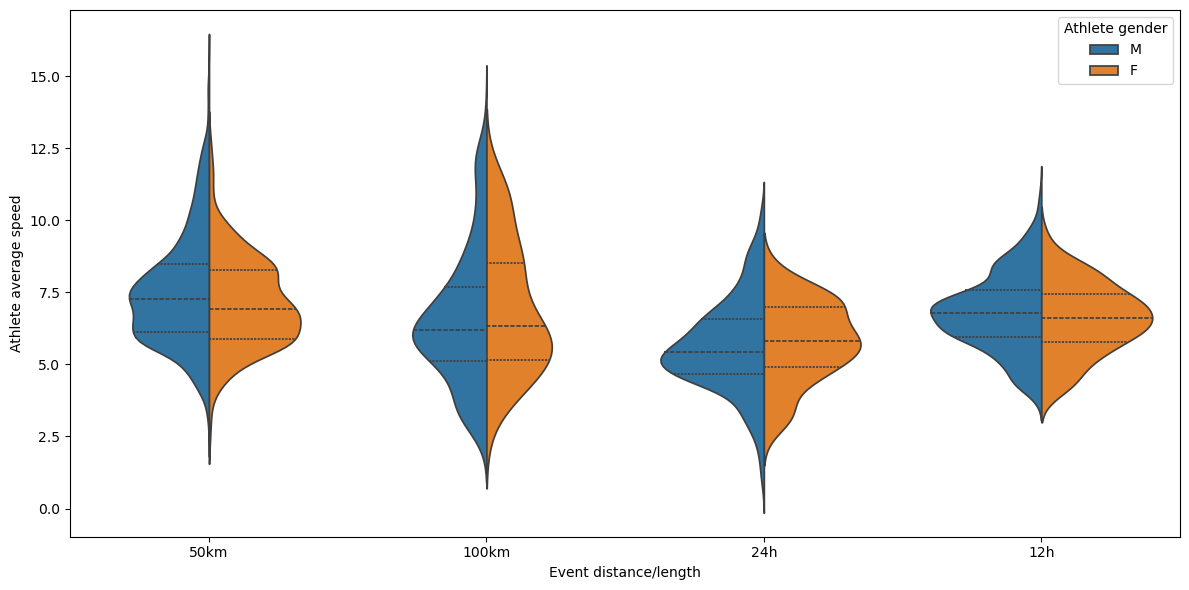

In [115]:
# the relationship between the length of the race and athlethe average speed
plt.figure(figsize=(12, 6))
sns.violinplot(data =df, x = 'Event distance/length', y='Athlete average speed', hue = 'Athlete gender', split = True, inner='quartz')
plt.tight_layout()

## We will re-format the event date to date format

In [118]:
df['Event dates']=pd.to_datetime(df['Event dates'],errors='coerce')

In [120]:
df['Athlete performance']=pd.to_datetime(df['Athlete performance'],errors='coerce')

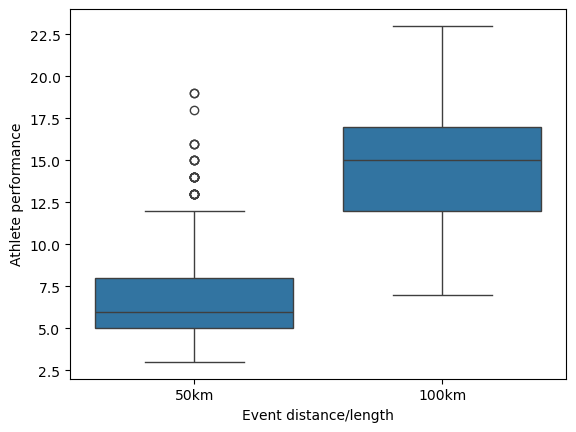

In [124]:
filtered_df = df[(df['Event distance/length'] == '50km') | (df['Event distance/length'] == '100km')]
sns.boxplot(y=filtered_df['Athlete performance'].dt.hour,x=filtered_df['Event distance/length'])
plt.show()

In [130]:
filtered_df.head()

,index,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age
0,5843,2018,2018-03-18,TITI 50km Road Ultra Marathon (MAS),50km,282,2025-02-24 08:44:07,IND,M,M40,5.724,5211,41
1,16245,2018,2018-03-17,Om Die Dam 50km (RSA),50km,2491,2025-02-24 05:18:55,IND,M,M23,9.407,15497,30
2,23416,2018,2018-03-10,North C Trail (BEL),50km,192,2025-02-24 08:04:30,IND,F,W23,6.192,22117,28
3,24745,2018,2018-03-10,Crazy Desert Trail Race 50k (USA),50km,59,2025-02-24 06:21:38,IND,M,M23,7.861,23372,31
4,25299,2018,2018-03-10,Dirty Duo Trail Run (CAN),50km,34,2025-02-24 04:58:08,IND,M,M35,10.063,23912,38


## **Time in hours vs Speed**

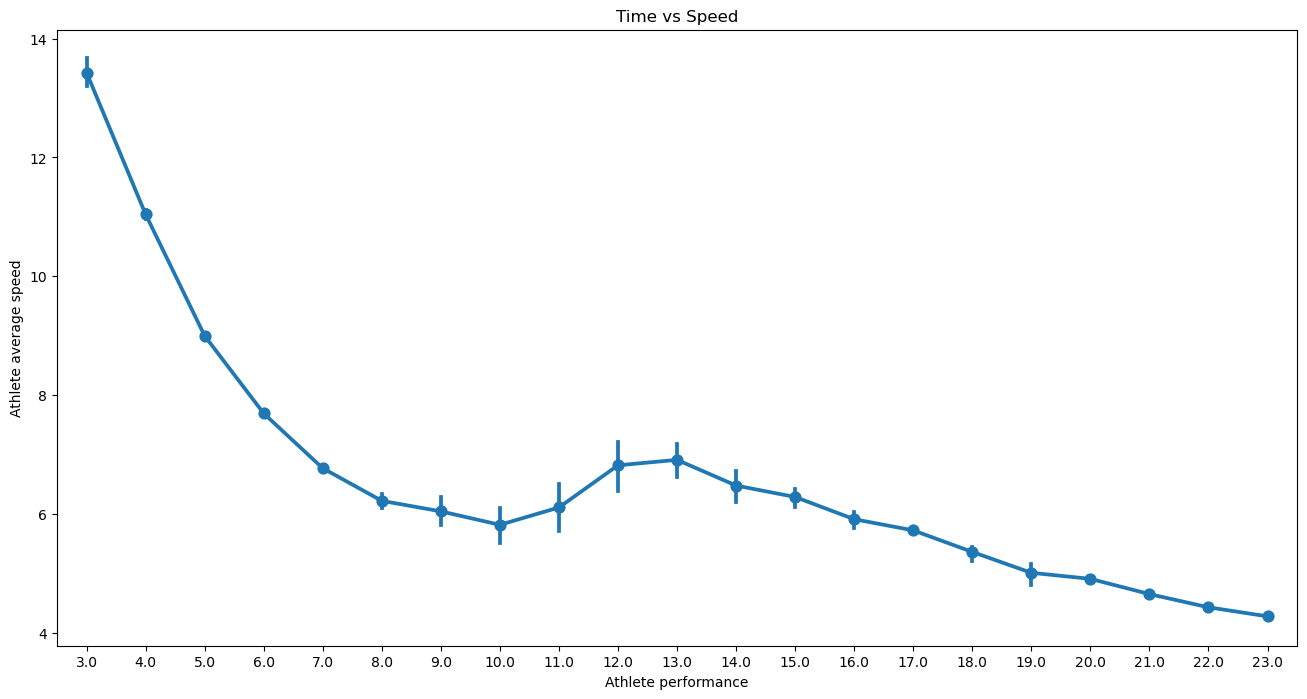

In [136]:
plt.figure(figsize=(16,8))
sns.pointplot(data=filtered_df,x=filtered_df['Athlete performance'].dt.hour,y=df['Athlete average speed'],estimator='mean')
plt.title('Time vs Speed')
plt.show()

In [138]:
df['Athlete_performance_in_hours']=df['Athlete performance'].dt.hour+(df['Athlete performance'].dt.minute/60)

In [140]:
df.head()

,index,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age,Athlete_performance_in_hours
0,5843,2018,2018-03-18,TITI 50km Road Ultra Marathon (MAS),50km,282,2025-02-24 08:44:07,IND,M,M40,5.724,5211,41,8.733333
1,16245,2018,2018-03-17,Om Die Dam 50km (RSA),50km,2491,2025-02-24 05:18:55,IND,M,M23,9.407,15497,30,5.300000
2,23416,2018,2018-03-10,North C Trail (BEL),50km,192,2025-02-24 08:04:30,IND,F,W23,6.192,22117,28,8.066667
3,24745,2018,2018-03-10,Crazy Desert Trail Race 50k (USA),50km,59,2025-02-24 06:21:38,IND,M,M23,7.861,23372,31,6.350000
4,25299,2018,2018-03-10,Dirty Duo Trail Run (CAN),50km,34,2025-02-24 04:58:08,IND,M,M35,10.063,23912,38,4.966667


In [142]:
events_by_hours=df.groupby('Event name')['Athlete_performance_in_hours'].agg(['mean','count','min','max']).query('count>20')
events_by_hours.head()

,mean,count,min,max
Event name,,,,
BNP Ultra (IND),6.024272,103,3.933333,8.066667
Bangalore 100 km Ultra Marathon (IND),15.286458,80,10.100000,23.233333
Bangalore 50 km Ultra Marathon (IND),6.420788,182,3.933333,9.600000
Bengaluru 100 km Stadium Run (IND),9.472581,31,7.933333,13.350000
Bhatti Lakes 100 km (IND),16.203846,39,11.866667,17.933333


## **Event name that has most performance time in hours**

In [144]:
most_performance_time=events_by_hours.sort_values(by='mean',ascending=False)
most_performance_time.head()

,mean,count,min,max
Event name,,,,
Hennur Bamboo 100 Km Ultra (IND),18.674444,90,11.600000,23.916667
Jarakabande Eco Ultra 100 Km (IND),18.355556,27,12.750000,22.566667
Bhatti Lakes 100 km (IND),16.203846,39,11.866667,17.933333
Bangalore 100 km Ultra Marathon (IND),15.286458,80,10.100000,23.233333
Pune 100 km UltraMarathon (IND),15.018750,32,12.166667,16.833333


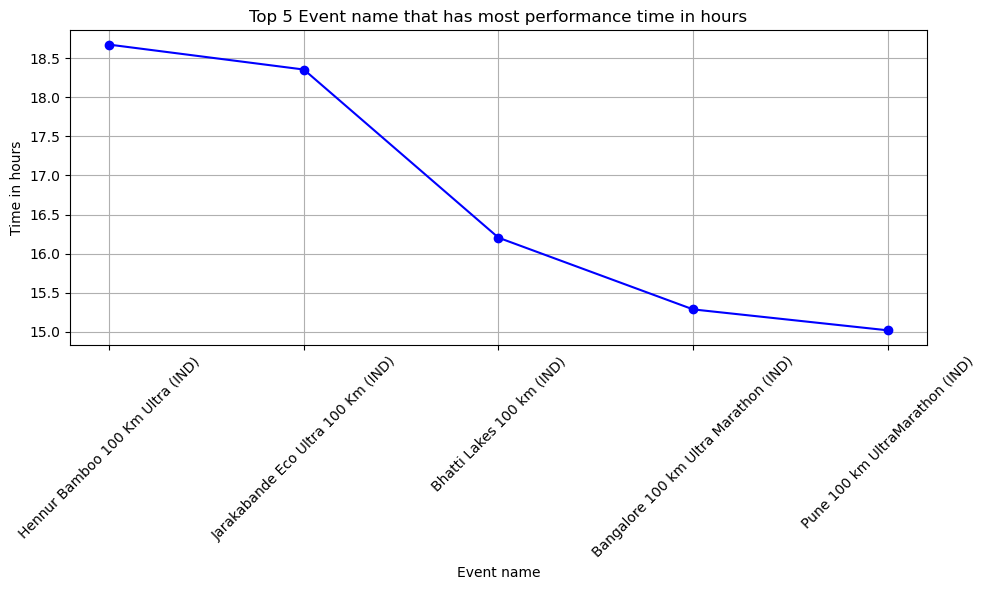

In [146]:
plt.figure(figsize=(10, 6))
plt.plot(most_performance_time.head().index, most_performance_time.head()['mean'], marker='o', color='b', linestyle='-')
plt.xlabel('Event name')
plt.ylabel('Time in hours')
plt.title('Top 5 Event name that has most performance time in hours')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## **Each Event with fastest Finish**

In [148]:
fastest_Finish=events_by_hours.sort_values(by='min',ascending=True)
fastest_Finish.head()

,mean,count,min,max
Event name,,,,
Tata Ultra Marathon (IND),6.080478,467,3.350000,8.200000
Hyderabad Ultra Marathon (IND),6.070202,66,3.450000,9.183333
Ultra Marathon Bengaluru (IND),5.993333,115,3.616667,8.233333
Ruggedian Kolhapur Run (IND),5.803241,36,3.916667,8.366667
BNP Ultra (IND),6.024272,103,3.933333,8.066667


## **Top 5 Event with fastest Finish**

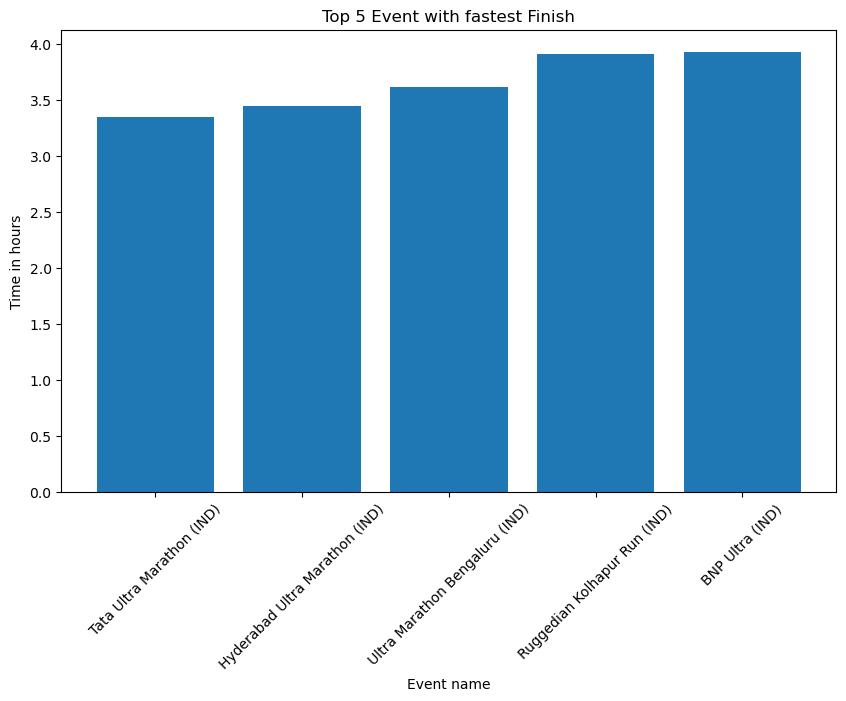

In [150]:
plt.figure(figsize=(10, 6))
plt.bar(fastest_Finish.head().index, fastest_Finish.head()['min'])
plt.xlabel('Event name')
plt.ylabel('Time in hours')
plt.title('Top 5 Event with fastest Finish')
plt.xticks(rotation=45)
plt.show()

## **Each Event with Slowest Finish**

In [152]:
Slowest_Finish=events_by_hours.sort_values(by='max',ascending=False)
Slowest_Finish.head()

,mean,count,min,max
Event name,,,,
Hennur Bamboo 100 Km Ultra (IND),18.674444,90,11.600000,23.916667
Bangalore 100 km Ultra Marathon (IND),15.286458,80,10.100000,23.233333
Jarakabande Eco Ultra 100 Km (IND),18.355556,27,12.750000,22.566667
Jarakabande Eco Ultra 50 Km (IND),8.152299,29,4.966667,18.250000
Bhatti Lakes 100 km (IND),16.203846,39,11.866667,17.933333


## **Top 5 Event with slowest Finish**

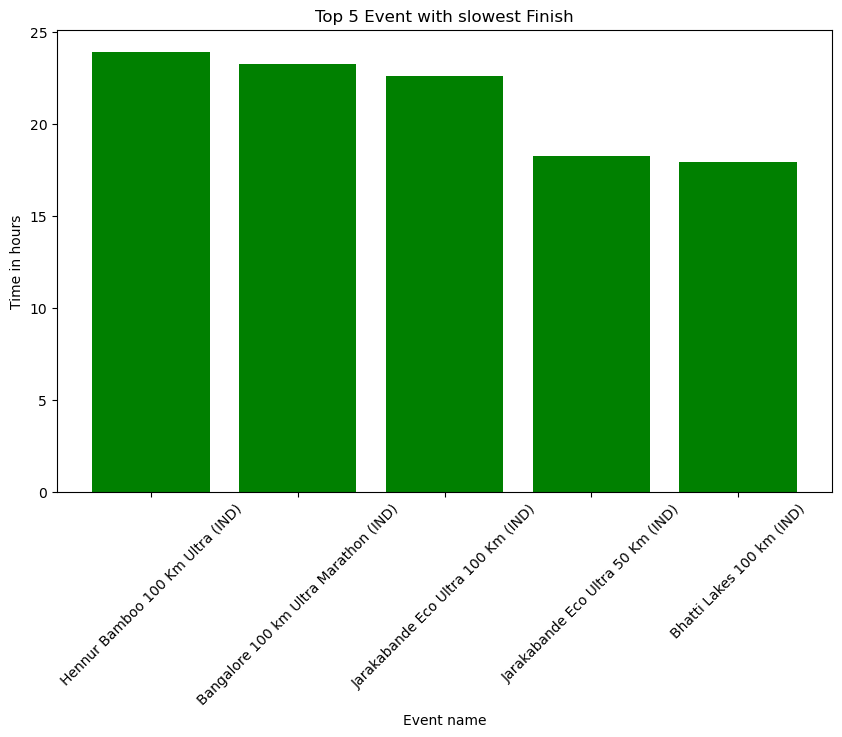

In [154]:
plt.figure(figsize=(10, 6))
plt.bar(Slowest_Finish.head().index, Slowest_Finish.head()['max'],color='green')
plt.xlabel('Event name')
plt.ylabel('Time in hours')
plt.title('Top 5 Event with slowest Finish')
plt.xticks(rotation=45)
plt.show()

## **Does season has effect in Athlete performance**

**Seasons in India**
- Spring (2 - 3)
- Summer (4 - 8)
- Fall (9 - 11)
- Winter (11 - 2)

In [157]:
df['seasons']=df['Event dates'].dt.month.apply(lambda x: 'winter' if x > 11 else 'fall' if x > 8 else 'summer' if x > 3 else 'spring' if x > 2 else 'winter')
df.head()

,index,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete_Age,Athlete_performance_in_hours,seasons
0,5843,2018,2018-03-18,TITI 50km Road Ultra Marathon (MAS),50km,282,2025-02-24 08:44:07,IND,M,M40,5.724,5211,41,8.733333,spring
1,16245,2018,2018-03-17,Om Die Dam 50km (RSA),50km,2491,2025-02-24 05:18:55,IND,M,M23,9.407,15497,30,5.300000,spring
2,23416,2018,2018-03-10,North C Trail (BEL),50km,192,2025-02-24 08:04:30,IND,F,W23,6.192,22117,28,8.066667,spring
3,24745,2018,2018-03-10,Crazy Desert Trail Race 50k (USA),50km,59,2025-02-24 06:21:38,IND,M,M23,7.861,23372,31,6.350000,spring
4,25299,2018,2018-03-10,Dirty Duo Trail Run (CAN),50km,34,2025-02-24 04:58:08,IND,M,M35,10.063,23912,38,4.966667,spring


## **Season wise participation**

In [159]:
season_count=df.seasons.value_counts()
season_count

seasons
winter    3453
fall      1678
summer     990
spring     232
Name: count, dtype: int64

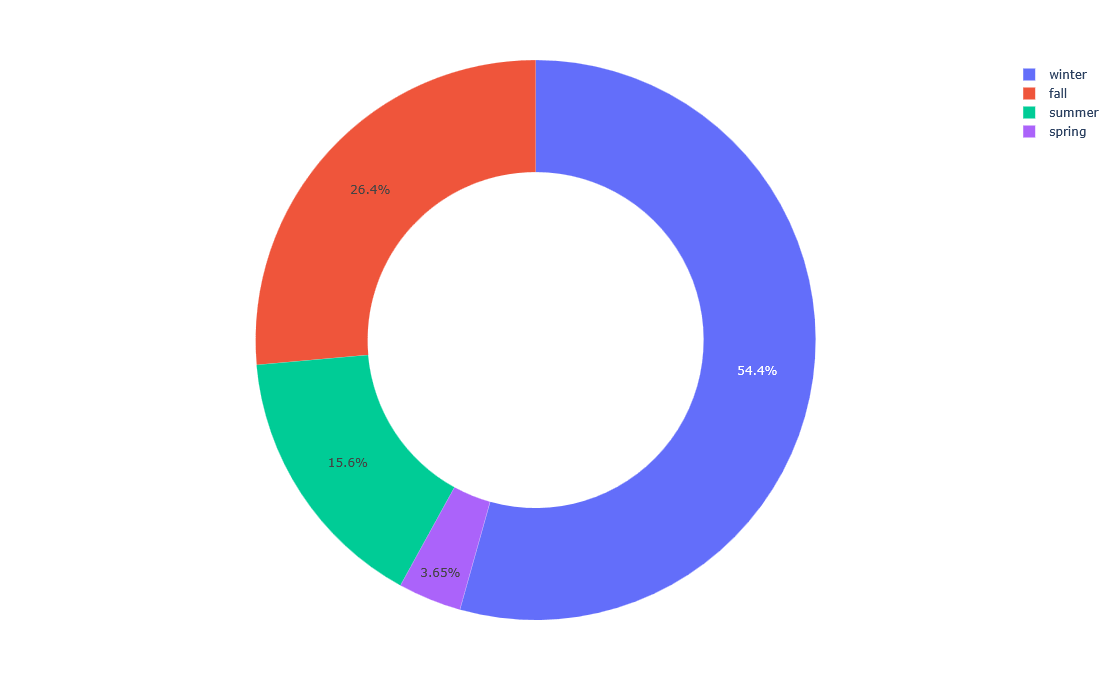

In [175]:
px.pie(names=season_count.index,values=season_count.values,hole=.6, width = 700, height = 700)

## **Comparing the average speed  and participation of Athletes by season and gender**

In [177]:
#comparing the average speed by season and gender
Season_race = df.groupby(['seasons','Athlete gender']).agg({'Athlete gender': 'count', 'Athlete average speed': ['mean', 'count']})
Season_race

Athlete gender Athlete average speed      
                                count                  mean count
seasons Athlete gender                                           
fall    F                         195              6.810046   195
        M                        1483              7.103766  1483
spring  F                          19              6.635000    19
        M                         213              7.105859   213
summer  F                          94              7.326191    94
        M                         896              7.611176   896
winter  F                         437              6.653442   437
        M                        3016              6.923200  3016

In [179]:
Season_race = df.groupby('seasons')['Athlete average speed'].agg(['mean', 'count']).sort_values(by='mean',ascending=False)
Season_race

,mean,count
seasons,,
summer,7.584117,990
fall,7.069633,1678
spring,7.067297,232
winter,6.889061,3453


## **Effect of season on Athlete average speed**

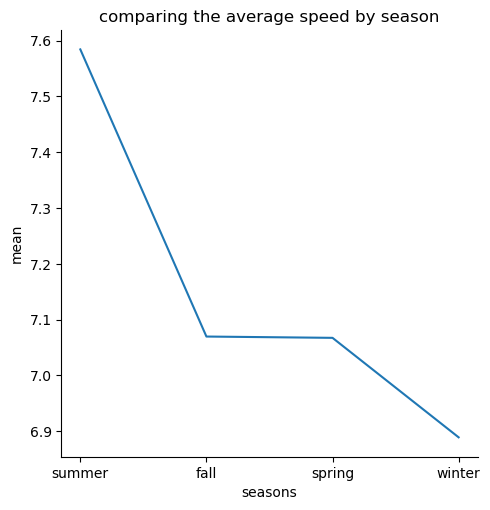

In [181]:
sns.relplot(data = Season_race , x = 'seasons' , y = 'mean',kind = 'line' )
plt.title('comparing the average speed by season')
plt.show()